<a href="https://colab.research.google.com/github/kar-m/airplane-data-and-mini-analysis/blob/main/airline_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
from urllib.request import Request, urlopen
import tqdm
import matplotlib.pyplot as plt

In [140]:
av_years = range(1920, 2022)

In [141]:
a = []
for year in tqdm.tqdm(av_years):
  url = f"http://www.planecrashinfo.com/{year}/{year}.htm"
  req = Request(url,headers={'User-Agent': 'Mozilla/5.0'})
  html = urlopen(req).read()
  html = str(html).replace('<br>','~')
  alpha = pd.read_html(html)[0]
  alpha.columns = alpha.loc[0]
  alpha.drop(index=0, inplace=True)
  a.append(alpha)

100%|██████████| 102/102 [00:21<00:00,  4.76it/s]


In [142]:
data = pd.concat(a)

In [143]:
data.head()

,Date,Location / Operator,Aircraft Type / Registration,Fatalities
1,17 Sep 1908,"Fort Myer, Virginia~Military - U.S. Army\n",Wright Flyer III~?,1/2(0)
2,07 Sep 1909,"Juvisy-sur-Orge, France~?\n",Wright Byplane~SC1,1/1(0)
3,12 Jul 1912,"Atlantic City, New Jersey~Military - U.S. Navy\n",Dirigible~?,5/5(0)
4,06 Aug 1913,"Victoria, British Columbia, Canada~Private\n",Curtiss seaplane~?,1/1(0)
5,09 Sep 1913,Over the North Sea~Military - German Navy\n,Zeppelin L-1 (airship)~?,14/20(0)


In [144]:
data.reset_index(drop=True, inplace=True)
data.tail()

,Date,Location / Operator,Aircraft Type / Registration,Fatalities
5006,21 May 2021,"Near Kaduna, Nigeria~Military - Nigerian Air F...",Beechcraft B300 King Air 350i~NAF203,11/11(0)
5007,10 Jun 2021,"Near Pyin Oo Lwin, Myanmar~Military - Myanmar ...",Beechcraft 1900D~4610,12/14(0)
5008,04 Jul 2021,"Patikul, Sulu, Philippines~Military - Philippi...",Lockheed C-130H Hercules~5125,50/96(3)
5009,06 Jul 2021,"Palana, Russia~ \tKamchatka Aviation Enterprise\n",Antonov An 26B-100~\tRA-26085,28/28(0)
5010,12 Sep 2021,"Kazachinskoye\xa0, Russia~Aeroservice/SiLA\n",Let L-410UVP-E20~\tRA-67042,4/16(0)


In [145]:
data.columns = ['DATE', 'LOCATION_OPER', 'TYPE_REG', 'FATALITIES']

In [146]:
data['TYPE_REG']

0                         Wright Flyer III~?
1                         Wright Byplane~SC1
2                                Dirigible~?
3                         Curtiss seaplane~?
4                   Zeppelin L-1 (airship)~?
                        ...                 
5006    Beechcraft B300 King Air 350i~NAF203
5007                   Beechcraft 1900D~4610
5008           Lockheed C-130H Hercules~5125
5009           Antonov An 26B-100~\tRA-26085
5010             Let L-410UVP-E20~\tRA-67042
Name: TYPE_REG, Length: 5011, dtype: object

In [147]:
a = []
b = []
for loc in data['LOCATION_OPER']:
  alpha = loc.split('~')
  a.append(alpha[0])
  temp = alpha[1].replace('\t', '')
  temp = temp.replace('\\', '~~')
  temp = temp.replace('~~n', '')
  b.append(temp)

In [148]:
c = []
d = []
for loc in data['TYPE_REG']:
  alpha = loc.split('~')
  c.append(alpha[0])
  d.append(alpha[1])

In [149]:
data['LOCATION'] = a
data['OPERATOR'] = b
data['TYPE'] = c
data['REGISTRATION'] = d

In [150]:
data.head()

,DATE,LOCATION_OPER,TYPE_REG,FATALITIES,LOCATION,OPERATOR,TYPE,REGISTRATION
0,17 Sep 1908,"Fort Myer, Virginia~Military - U.S. Army\n",Wright Flyer III~?,1/2(0),"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,?
1,07 Sep 1909,"Juvisy-sur-Orge, France~?\n",Wright Byplane~SC1,1/1(0),"Juvisy-sur-Orge, France",?,Wright Byplane,SC1
2,12 Jul 1912,"Atlantic City, New Jersey~Military - U.S. Navy\n",Dirigible~?,5/5(0),"Atlantic City, New Jersey",Military - U.S. Navy,Dirigible,?
3,06 Aug 1913,"Victoria, British Columbia, Canada~Private\n",Curtiss seaplane~?,1/1(0),"Victoria, British Columbia, Canada",Private,Curtiss seaplane,?
4,09 Sep 1913,Over the North Sea~Military - German Navy\n,Zeppelin L-1 (airship)~?,14/20(0),Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),?


In [159]:
known_types = data[data['TYPE'] != '?']

In [160]:
len(known_types.iloc[-1000:, 6].unique())

715

In [169]:
a = (known_types).groupby(by='TYPE').count()['DATE']
a.sort_values(ascending=False)

TYPE
Douglas DC-3                                333
de Havilland Canada DHC-6 Twin Otter 300     81
Douglas C-47A                                70
Douglas C-47                                 64
Douglas DC-4                                 41
                                           ... 
Ilysushin Il-76TD                             1
Ilyushin 114T                                 1
Ilyushin 14M                                  1
Ilyushin 14P                                  1
A-7D Corsair                                  1
Name: DATE, Length: 2459, dtype: int64

In [172]:
douglas_dates = known_types[known_types['TYPE'] == 'Douglas DC-3']['DATE']

In [177]:
douglas_dates = douglas_dates.astype('datetime64[ns]')

In [178]:
douglas_dates['year'] = pd.Series([date.year for date in douglas_dates])

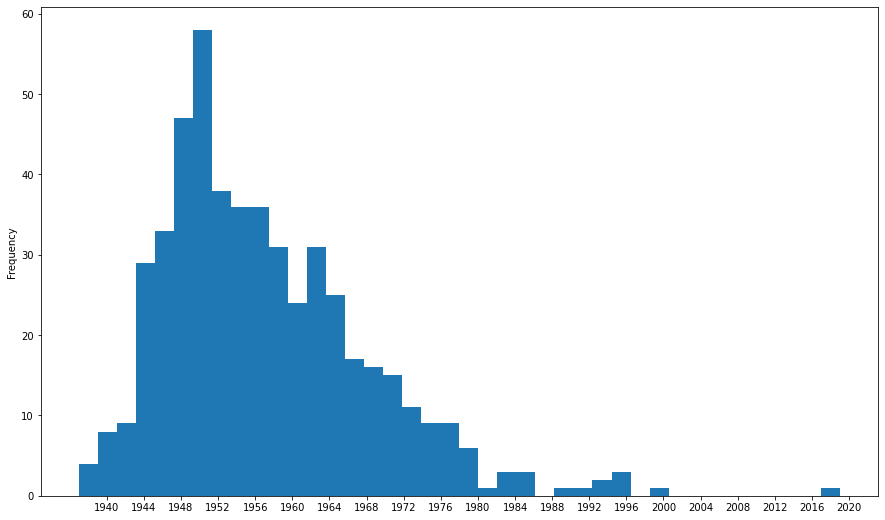

In [192]:
plt.figure(figsize=(15, 9))
douglas_dates['year'].plot(kind='hist', bins=40)
plt.xticks(ticks = range(1940, 2022, 4))
plt.show()

In [215]:
douglas_dates = known_types[known_types['TYPE'].str.contains('Douglas')]['DATE']
not_douglas = known_types[~known_types['TYPE'].str.contains('Douglas')]['DATE']

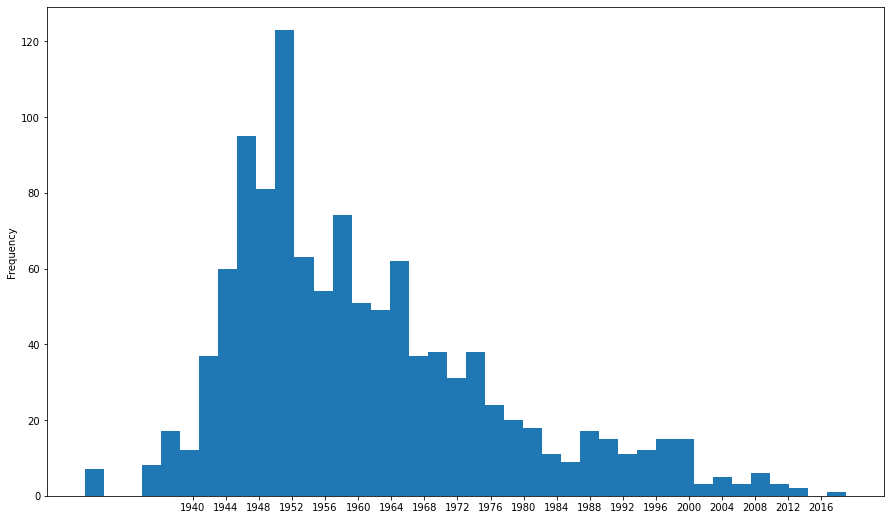

In [216]:
douglas_dates = douglas_dates.astype('datetime64[ns]')
douglas_dates['year'] = pd.Series([date.year for date in douglas_dates])
plt.figure(figsize=(15, 9))
douglas_dates['year'].plot(kind='hist', bins=40)
plt.xticks(ticks = range(1940, 2020, 4))
plt.show()

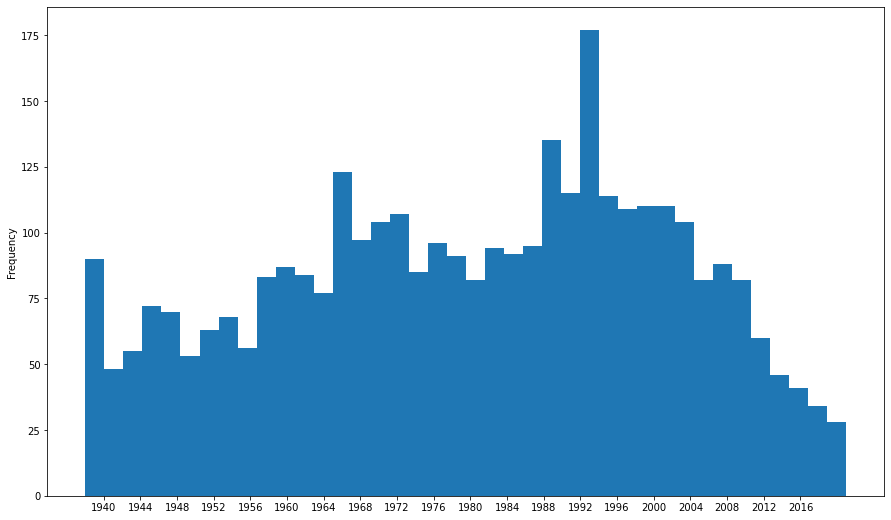

In [219]:
not_douglas_d = not_douglas.astype('datetime64[ns]')
not_douglas_d['year'] = pd.Series([date.year for date in not_douglas_d])
plt.figure(figsize=(15, 9))
not_douglas_d['year'][not_douglas_d['year']>1937].plot(kind='hist', bins=40)
plt.xticks(ticks = range(1940, 2020, 4))
plt.show()

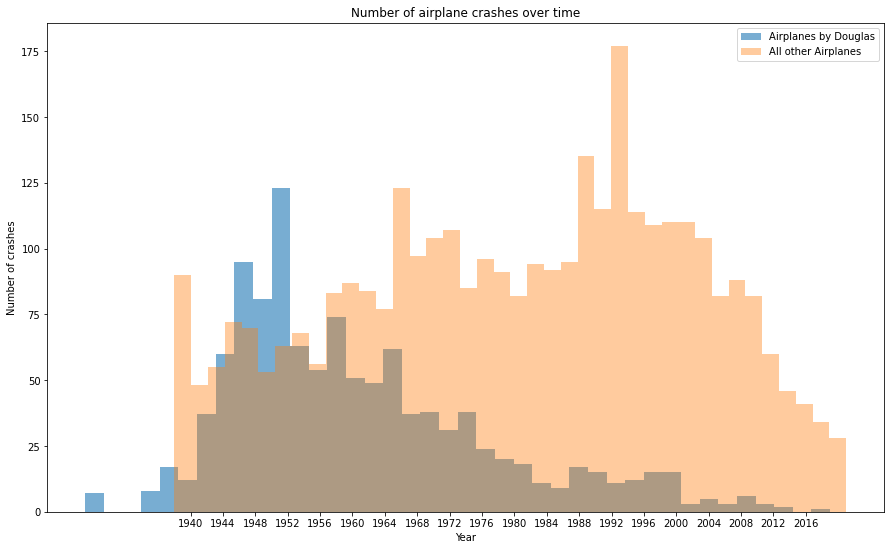

In [225]:
plt.figure(figsize=(15, 9))
douglas_dates['year'].plot(kind='hist', bins=40, alpha=0.6)
not_douglas_d['year'][not_douglas_d['year']>1937].plot(kind='hist', bins=40, alpha=0.4)
plt.legend(labels=['Airplanes by Douglas', 'All other Airplanes'])
plt.title('Number of airplane crashes over time')
plt.xlabel('Year')
plt.ylabel('Number of crashes')
plt.xticks(ticks = range(1940, 2020, 4))
plt.show()

## From these graphs it might be easy to conclude that Douglas ia very bad, no-good airplane producing company. Especially their Douglas DC-3 model. However, the interesting part is that it is quite the opposite. Douglas DC-3 was a monumental airplane, the design of which was copied by several countries including USSR and Japan. The reason a lot of these crashes are by Douglas is *because* Douglas made such great airplanes - they were used the most.

#### This can be interpreted as an example of how data can be misleading and can be used by malicious actors to lead people to incorrect conclusions.